# Surviving a meteor strike

A meteor is approaching the earth and we want to make sure it won't take us to extinction. 
A group of scientists is trying to estimate the orbit by using historical data gathered about previous orbits of similar meteors.


<img src="images/problem.png" width="500">

## Scientific prediction
Scientist have used this data alongside their knowledge to estimate an 80-minute orbit, that is, an orbit from -40 minutes to +40 minutes. 

t=0 corresponds to the time of crossing the impact region. It looks like the meteor will be close! Perhaps it won't hit us, but we must make sure we are right!

<img src="images/Scientific_prediction.png" width="500">

## Our Task
You have data for the path a previous meteor took during a period of 20 minutes, 10 minutes before and 10 minutes after crossing the impact region. You will train a model on this data and extrapolate your predictions to an 80-minute orbit to see how it compares to the scientists prediction. Will your orbit be similar to that of the scientists, where we don't die just by a small bit?

<img src="images/meteor_orbit_data.jpg" width="500">

### 1- Laod Data

Your training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor at that time step.

This data is stored in two numpy arrays: 
- one called `time_steps`  , containing the features, 
- and another called `y_positions`, with the labels.

We will build a simple regression model to forecast the orbit of the meteor!
-  It should be able to predict the y positions for the meteor orbit at future time steps.





In [1]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
##loading dataset 
data= './dataset/orbit.csv'
orbit = pd.read_csv(data)


#totalInstances=len(orbit)
#print(totalInstances)
print(orbit.shape)

orbit.head()

(2000, 2)


,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [7]:
time_steps = orbit['time_steps'].to_numpy()
y_positions = orbit['y'].to_numpy()

### 2- Define a model
You are closer to forecasting the meteor orbit! It’s important to note we aren’t using an activation function in our output layer since y_positions aren’t bounded and they can take any value. Your model is performing regression.



In [8]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1, ), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


### 3- Compile Keras Model.
training your Keras models you need to compile them. This can be done with the `.compile()` method. The `.compile()` method takes arguments such as the `optimizer`, used for weight updating, and the `loss` function, which is what we want to minimize.

In [9]:
# Compile your model
model.compile(optimizer='adam', loss='mse')

### 4- Training
Training your model is as easy as calling the `.fit()` method, passing on the features, labels and a number of epochs to train for.


In [10]:
print('Training started..., this can take a while:')

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs=30)

Training started..., this can take a while:
Epoch 1/30
63/63 [==============================] - 4s 692us/step - loss: 1528.7141
Epoch 2/30
63/63 [==============================] - 0s 660us/step - loss: 263.2816
Epoch 3/30
63/63 [==============================] - 0s 627us/step - loss: 138.7433
Epoch 4/30
63/63 [==============================] - 0s 740us/step - loss: 118.2852
Epoch 5/30
63/63 [==============================] - 0s 692us/step - loss: 93.2383
Epoch 6/30
63/63 [==============================] - 0s 660us/step - loss: 62.7979
Epoch 7/30
63/63 [==============================] - 0s 660us/step - loss: 36.2383
Epoch 8/30
63/63 [==============================] - 0s 676us/step - loss: 25.1934
Epoch 9/30
63/63 [==============================] - 0s 660us/step - loss: 17.0735
Epoch 10/30
63/63 [==============================] - 0s 692us/step - loss: 11.1531
Epoch 11/30
63/63 [==============================] - 0s 660us/step - loss: 6.6408
Epoch 12/30
63/63 [=============================

### 5- Evaluating
evaluate our model on this very same data, let's see if your model can learn the meteor's trajectory.


In [11]:
# Evaluate your model
print("Final loss value:", model.evaluate(time_steps, y_positions))

63/63 [==============================] - 0s 563us/step - loss: 0.1101
Final loss value: 0.11008082330226898


### 6-Predicting the orbit!

You've already trained a `model` that approximates the orbit of the meteor approaching Earth and it's loaded for you to use.

Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. You will now visualize how your model behaves on unseen data.

Remember `np.arange(x,y)` produces a range of values from `x` to `y-1`. That is the `[x, y)` interval.

In [20]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

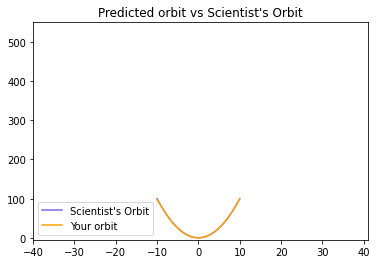

In [23]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit
plot_orbit(twenty_min_orbit)

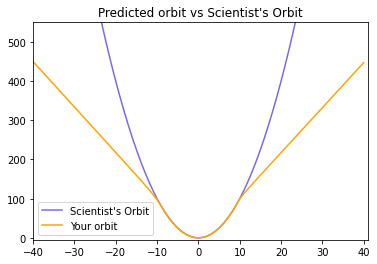

In [24]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important.